(capitulo-bibliotecas_matplotlib)=
# A biblioteca *MatplotLib*

## Introdução

Neste capítulo abordamos algumas funcionalidades da biblioteca *Matplotlib*, em particular alguns tipos de gráficos que podem ser gerados a partir do seu módulo *pyplot*: 
- gráficos 2D,
- gráficos para registo de ocorrências,
- gráficos circulares,
- gráficos de barras.


## Objetivos de aprendizagem

No final deste capítulo deveremos ser capazes de criar vários tipos de gráficos usando as funcionalidades básicas do módulo *pyplot* da biblioteca *{index}`Matplotlib`*:
- o método *plot*,
- o método *scatter*,
- o método *pie*,
- os métodos *bar* e *barh*.


## Terminologia

Um gráfico é composto por várias partes e é útil conhecermos os termos que designam cada uma das partes.

![Anatomia de uma imagem - da documentação do Matplotlib 3.5.1](https://matplotlib.org/stable/_images/anatomy.png)



## Generalidades

A maioria das funcionalidade da biblioteca Matplotlib está no seu módulo chamado *{index}`pyplot`*. Para usarmos este módulo é necessário a sua importação para o espaço de trabalho,

In [1]:
import matplotlib.pyplot as plt

Existe outro pacote de Python, NumPy, que será visto em mais detalhe numa aula futura. Deste pacote, hoje usaremos `arange` que é semelhante ao `range` e acrescenta suporte a números reais e o módulo `random` para a geração de números pseudo-aleatórios.

## Os gráficos *plot*

De modo a mostrarmos as capacidades dos gráficos vamos gerar dados quadráticos e exponenciais,

In [2]:
import numpy as np
amostras = []
funcQuad = []
funcExpo = []

for x in np.arange(0, 20,0.5):
    amostras.append(x)
    funcQuad.append(x**2)
    funcExpo.append(1.5**x)
    

Começamos por visualizar os dois tipos de dados numa só figura usando vários métodos disponíveis:
+ `plot`  - com apenas um argumento $y$: desenha o gráfico de $y$ (eixo-y) versus o número de pontos do vector $y$ (eixo-x). Com dois argumentos $x$ e $y$: desenha o gráfico de $y$ (eixo-y) versus $x$ (eixo-x). Este dois vectores devem ter a mesma dimensão,
+ `show`  - mostra todas a figuras abertas através do método *plot*,

+ `figure` - cria uma nova figura ou activa uma figura já existente,
+ `clf` - apaga a figura actual.

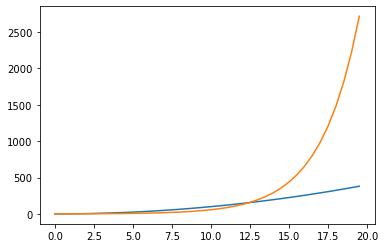

In [3]:
plt.figure('quad_exp')
plt.clf()

plt.plot(amostras, funcQuad)
plt.plot(amostras, funcExpo)
plt.show() 


```{admonition} Nota
:class: note
Usamos o método `clf()` logo após a criação `figure('\<nome\>')`. Este procedimento é considerado uma boa prática para remover quaisquer atributos não desejados sobretudo quando manipulamos várias figuras.
```

A visualização de todos os dados numa só figura pode ter a vantagem de permitir a comparação entre estes. Porém, caso as gamas de valores dos dados sejam muito díspares, pode ser útil uma visualização em figuras individuais, usando o método `figure` da seguinte forma,

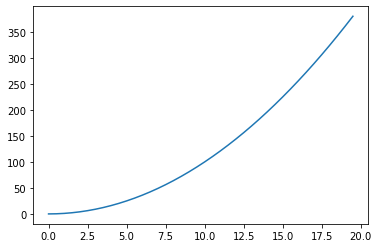

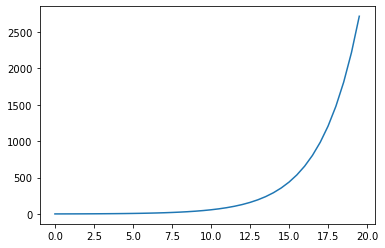

In [4]:
plt.figure('quad')
plt.clf()
plt.plot(amostras, funcQuad)

plt.figure('expo')
plt.clf()
plt.plot(amostras, funcExpo)

plt.show()


Para atribuirmos uma grandeza e unidades a cada eixo usamos os métodos `xlabel` e `ylabel` para o eixo-x e eixo-y, respectivamente. Podemos também atribuir um título às figuras usando o método `title` tal como se ilustra seguidamente,

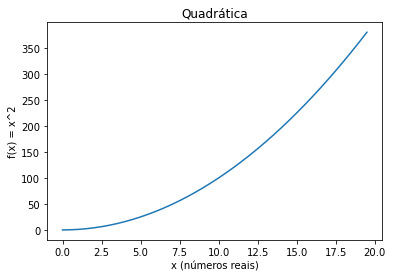

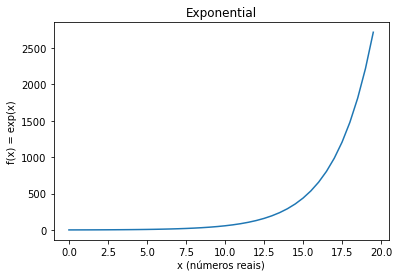

In [5]:
plt.figure('quad') 
plt.clf()
plt.xlabel('x (números reais)')
plt.ylabel('f(x) = x^2')
plt.title('Quadrática')
plt.plot(amostras, funcQuad)

plt.figure('expo')
plt.clf()
plt.plot(amostras, funcExpo)
plt.xlabel('x (números reais)')
plt.ylabel('f(x) = exp(x)') 
plt.title('Exponential')

plt.show()

Por vezes, e para efeitos de comparação, podemos querer que a gama de valores num determinado eixo seja a mesma. Por exemplo, se desejarmos que o eixo-y mostre os valores entre 0 e 400 podemos usar o método `ylim`. Podemos também usar grelhas nos gráficos usando o método `grid`,

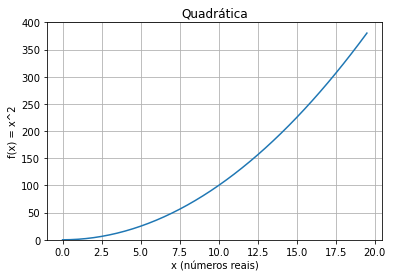

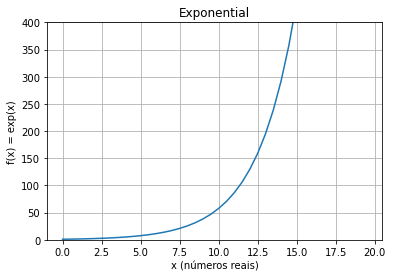

In [6]:
plt.figure('quad') 
plt.clf()
plt.ylim(0,400) # <--------------------
plt.xlabel('x (números reais)')
plt.ylabel('f(x) = x^2')
plt.title('Quadrática')
plt.plot(amostras, funcQuad)
plt.grid()

plt.figure('expo')
plt.clf()
plt.ylim(0,400) # <--------------------
plt.plot(amostras, funcExpo)
plt.xlabel('x (números reais)')
plt.ylabel('f(x) = exp(x)') 
plt.title('Exponential')
plt.grid()

plt.show()

É possível adicionar legendas às figuras usando a opcão `label` em `plot` juntamente com o método `legend`,

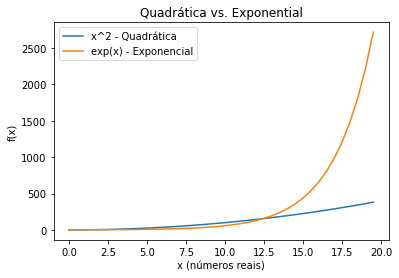

In [7]:
plt.figure('quad_exp')
plt.clf()

plt.plot(amostras, funcQuad, label = 'x^2 - Quadrática')
plt.plot(amostras, funcExpo, label = 'exp(x) - Exponencial')
plt.legend(loc = 'upper left') 

plt.xlabel('x (números reais)')
plt.ylabel('f(x)')
plt.title('Quadrática vs. Exponential')

plt.show() 

O método `plot` permite-nos definir as cores, o marcador e o seu tamanho, o estilo da linha e a sua a espessura no âmbito da representação dos dados nos gráficos. Por exemplo,

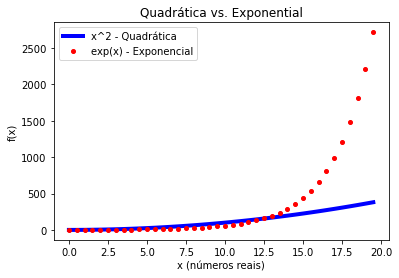

In [8]:
plt.figure('quad_exp')
plt.clf()

plt.plot(amostras, funcQuad, 'b-', label = 'x^2 - Quadrática' , linewidth = 4.0)
plt.plot(amostras, funcExpo, 'ro', label = 'exp(x) - Exponencial', markersize=4)
plt.legend(loc = 'upper left') 

plt.xlabel('x (números reais)')
plt.ylabel('f(x)')
plt.title('Quadrática vs. Exponential')

plt.show() 

A opção 'b-' define a linha contínua (-) de cor azul (b, *blue*). A opção 'ro' indica a cor vermelha (r, *red*) para os marcadores definidos por pontos (o). Para uma informação exaustiva de todas as opções podemos usar a função `help`.

In [9]:
# Para obter mais informação remova o comentário da linha seguinte
# help(plt.plot)

É possível ter mais que um gráfico na mesma figura. Para tal usamos o método `subplot` que aceita um argumento composto por 3 números que representam a disposição dos gráficos em termos de linhas e de colunas. O primeiro número define o número de linhas, o segundo o número de colunas e o terceiro número indica o índice do gráfico actual,

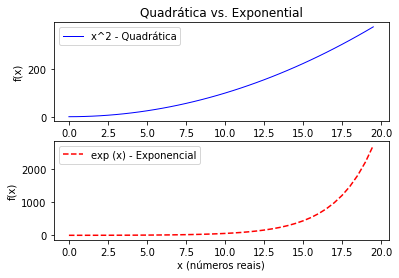

In [10]:
plt.figure('quad_exp')
plt.clf()

plt.subplot(211) # <--- (2) Duas linhas, (1) uma coluna, (1) primeira posição
plt.plot(amostras, funcQuad, 'b-', label = 'x^2 - Quadrática' , linewidth = 1.0)
plt.legend(loc = 'upper left') 
plt.title('Quadrática vs. Exponential')
plt.ylabel('f(x)')

plt.subplot(212) # <--- (2) Duas linhas, (1) uma coluna, (2) segunda posição
plt.plot(amostras, funcExpo, 'r--', label = 'exp (x) - Exponencial')
plt.legend(loc = 'upper left') 
plt.xlabel('x (números reais)')
plt.ylabel('f(x)')

plt.show() 

No exemplo seguinte ilustramos o uso de notação científica para o eixo-y,

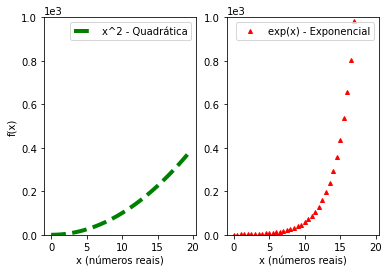

In [11]:
# e usar notação científica
plt.figure('quad exp')
plt.clf()

plt.subplot(121) # <--- Uma linha, duas colunas, primeira posição
plt.ticklabel_format(style='sci', axis = 'y', scilimits=(0,0)) 
plt.ylim(0, 1000)
plt.plot(amostras, funcQuad, 'g--', label = 'x^2 - Quadrática', linewidth = 4.0)
plt.xlabel('x (números reais)')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(122) # <--- Uma linha, duas colunas, segunda posição
plt.ticklabel_format(style='sci', axis = 'y', scilimits=(0,0))
plt.ylim(0, 1000)
plt.plot(amostras, funcExpo, 'r^',label = 'exp(x) - Exponencial', markersize=4)
plt.xlabel('x (números reais)')
plt.legend()

plt.show()

Podemos mudar o tipo de escala dos eixos de linear para logarítmica,

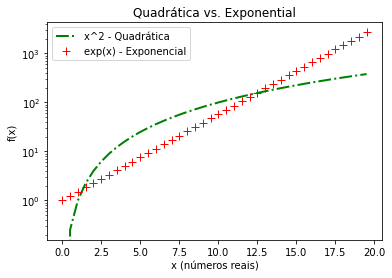

In [12]:
plt.figure('quad exp')
plt.clf()
plt.plot(amostras, funcQuad, 'g-.', label = 'x^2 - Quadrática', linewidth = 2.0)
plt.plot(amostras, funcExpo, 'r+',   label = 'exp(x) - Exponencial', markersize=8)
plt.yscale('log') # <---------------------------------------------------
plt.legend()
plt.xlabel('x (números reais)')
plt.ylabel('f(x)')
plt.title('Quadrática vs. Exponential');

Como referido, é possível usar o método `plot` com apenas o argumento relativo ao eixo-y. Por exemplo,

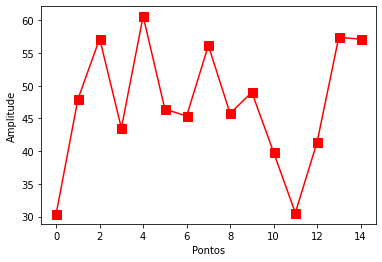

In [13]:
y= np.random.normal(50,10,15)

plt.plot(y,'r-s', markersize=9)
plt.xlabel('Pontos')
plt.ylabel('Amplitude')
plt.show()

## Os gráficos *scatter*

Este tipos de gráficos é útil nas situações em que pretendemos visualizar pontos associados a várias observações e explorar a existência de correlações. O método `scatter` aceita dois vectores do mesmo tamanho $y$ (eixo-y) e $x$ (eixo-x). Neste exemplo pretendemos visualizar o número de veículos observados a circular numa via durante as várias horas do dia,

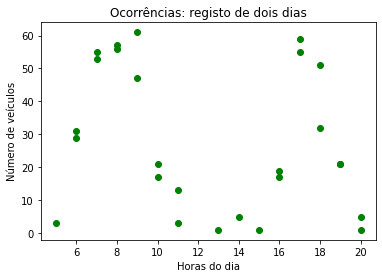

In [14]:
horas_do_dia = np.array([6,7,8,9,10,11,13,15,16,17,18,19,20,5,6,7,8,9,10,11,14,16,17,18,19,20])
num_veiculos = np.array([31,53,56,47,21,3,1,1,17,55,32,21,1,3,29,55,57,61,17,13,5,19,59,51,21,5])

plt.scatter(horas_do_dia, num_veiculos, c='green')

plt.xlabel('Horas do dia')
plt.ylabel('Número de veículos')
plt.title('Ocorrências: registo de dois dias')
plt.show()

Este tipo de gráficos pode beneficiar do método `colorbar` para enfatizar certas regiões do mesmo, por exemplo,

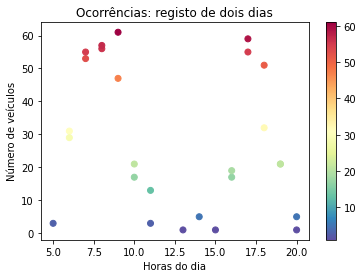

In [15]:
horas_do_dia = np.array([6,7,8,9,10,11,13,15,16,17,18,19,20,5,6,7,8,9,10,11,14,16,17,18,19,20])
num_veiculos = np.array([31,53,56,47,21,3,1,1,17,55,32,21,1,3,29,55,57,61,17,13,5,19,59,51,21,5])

colors = num_veiculos.copy()

plt.scatter(horas_do_dia, num_veiculos, c=colors, cmap='Spectral_r')
plt.colorbar()

plt.xlabel('Horas do dia')
plt.ylabel('Número de veículos')
plt.title('Ocorrências: registo de dois dias')
plt.show()

In [16]:
# Retire o comentário das linhas seguintes para consultar a documentação
# help(plt.scatter)
# help(plt.colorbar)

In [17]:
# Retire o comentário das linhas seguintes para consultar a documentação
# help(plt.subplots)
# help(eixos)
# help(surf)

## Os gráficos *pie*

Os gráficos do tipo *pie-chart* são bastante usados quando pretendemos ilustrar a proporção numérica no registo de ocorrências ou em observações estatísticas, por exemplo. Para este tipo de gráficos usamos o método `pie` o qual aceita um vector contendo os dados. Ilustramos com o seguinte exemplo,

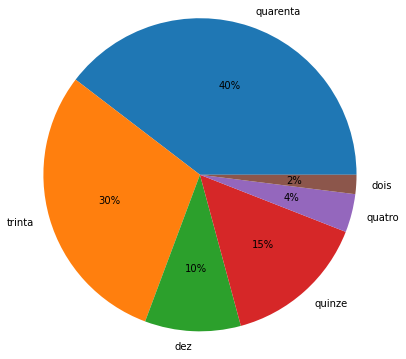

In [18]:
plt.pie([40,30,10,15,4,2], labels=['quarenta','trinta','dez','quinze','quatro','dois'],\
     autopct='%1.0f%%', radius=1.8);

As várias opções deste método podem ser acedidas usando a função `help`.

In [19]:
# Retire o comentário da linha seguinte para consultar a documentação
# help(plt.pie)

## Os gráficos de barras

Para criar gráficos de barras usamos o método `bar`. Este método aceita dois vectores, um para o eixo-x e o outro para o eixo-y. Por exemplo,

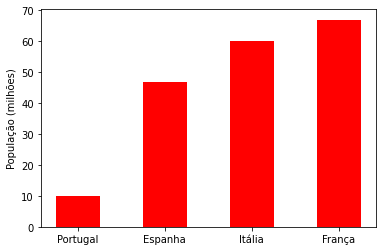

In [20]:
paises = np.array(["Portugal", "Espanha", "Itália", "França"])
população_M = np.array([10, 47, 60, 67])

plt.bar(paises,população_M, width = 0.5, color='red')
plt.ylabel('População (milhões)')
plt.show()

Podemos criar também gráficos de barras horizontais com o método `barh`. Por exemplo,

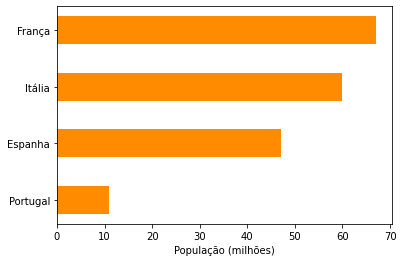

In [21]:
paises = np.array(["Portugal", "Espanha", "Itália", "França"])
população_M = np.array([11, 47, 60, 67])

plt.barh(paises,população_M, height = 0.5, color='darkorange')
plt.xlabel('População (milhões)')
plt.show()

## Resumo

Neste capítulo abordámos a criação de vários de tipos de gráficos para a visualização de dados e resultados usando o módulo `pyplot` da biblioteca *Matplotlib*. Em particular vimos a criação e manipulação de gráficos a duas dimensões, gráficos circulares e gráficos de barras.